In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
net = cv2.dnn.readNetFromDarknet('yolov3_custom .cfg','yolov3_custom_final.weights')

In [5]:
classes=[]
with open ('yolo.names','r') as f:
    classes = [line.strip()for line in f.readlines()]



In [6]:
my_img = cv2.imread('FudanPed00001_jpg.rf.546a993cb1d94d443dce2da7244e5a9c.jpg')
my_img = cv2.resize(my_img,(1280,720))

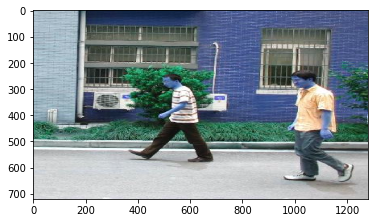

In [7]:
plt.imshow(my_img)

In [8]:
ht,wt,_ = my_img.shape

In [9]:
blob = cv2.dnn.blobFromImage(my_img,1/255,(416,416),(0,0,0),swapRB = True,crop = False)

In [10]:
blob.shape

(1, 3, 416, 416)

In [11]:
net.setInput(blob)

In [12]:
last_layer = net.getUnconnectedOutLayersNames()

In [13]:
layer_out = net.forward(last_layer)

In [14]:
boxes =[]
confidences =[]
class_ids =[]


for output in layer_out:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(detection[0] * wt)
            center_y = int(detection[1] * ht)
            w = int(detection[2]*wt)
            h = int(detection[3]*ht)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

In [15]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size= (len(boxes),3))

In [16]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(my_img,(x,y),(x+w,y+h),color,2)
    cv2.putText(my_img,label +" "+confidence,(x,y+20),font,2,(0,0,0),2)
    
cv2.imshow("img",my_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 